## load data

In [1]:
import sys
sys.path.append('../../')

In [2]:
import json
import pandas as pd
from mlinterpreter.util import preprocess_data

In [3]:
# 读入数据 和 schema
data_path = "../../demo_data/adult.data"
schema_path = "../../demo_data/schema.json"
df = pd.read_csv(data_path, header=None)
df.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex",
                 "capital-gain","capital-loss","hours-per-week","native-country","income"]
with open(schema_path, "r") as f:
    schema = json.load(f)

## preprocess data

In [4]:
# 预处理数据
preprocess_df, preprocess_dict = preprocess_data(df=df, schema=schema, process_label=True)

## build  LGBMClassifier

In [5]:
from mlinterpreter.model.builder import  build_lgb

In [6]:
import lightgbm

In [7]:
# 构建 lgb模型
# 通过 params 参数修改模型超参数
lgbmodel = build_lgb(df=preprocess_df, schema=schema)

/home/caihengxing/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/caihengxing/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['education', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data_in_leaf=100


/home/caihengxing/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/caihengxing/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's auc: 0.867131	valid_0's binary_logloss: 0.532603
Training until validation scores don't improve for 1 rounds
[2]	valid_0's auc: 0.87039	valid_0's binary_logloss: 0.515403
[3]	valid_0's auc: 0.883642	valid_0's binary_logloss: 0.500183
[4]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.486659
[5]	valid_0's auc: 0.88732	valid_0's binary_logloss: 0.474556
[6]	valid_0's auc: 0.892805	valid_0's binary_logloss: 0.463528
[7]	valid_0's auc: 0.892906	valid_0's binary_logloss: 0.453368
[8]	valid_0's auc: 0.89301	valid_0's binary_logloss: 0.44433
[9]	valid_0's auc: 0.893905	valid_0's binary_logloss: 0.435813
[10]	valid_0's auc: 0.893689	valid_0's binary_logloss: 0.428157
Early stopping, best iteration is:
[9]	valid_0's auc: 0.893905	valid_0's binary_logloss: 0.435813


/home/caihengxing/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


## Global surrogate tree

In [8]:
from mlinterpreter.surrogate.global_model import SurrogateTree

In [9]:
# 申明 SurrogateTree
tree = SurrogateTree(params={"max_depth":3})

In [10]:
# fit the SurrogateTree with the model
# return with the R2 value
tree.surrogate(model=lgbmodel, df=df, schema=schema, preprocess_dict=preprocess_dict)

0.910406535933929

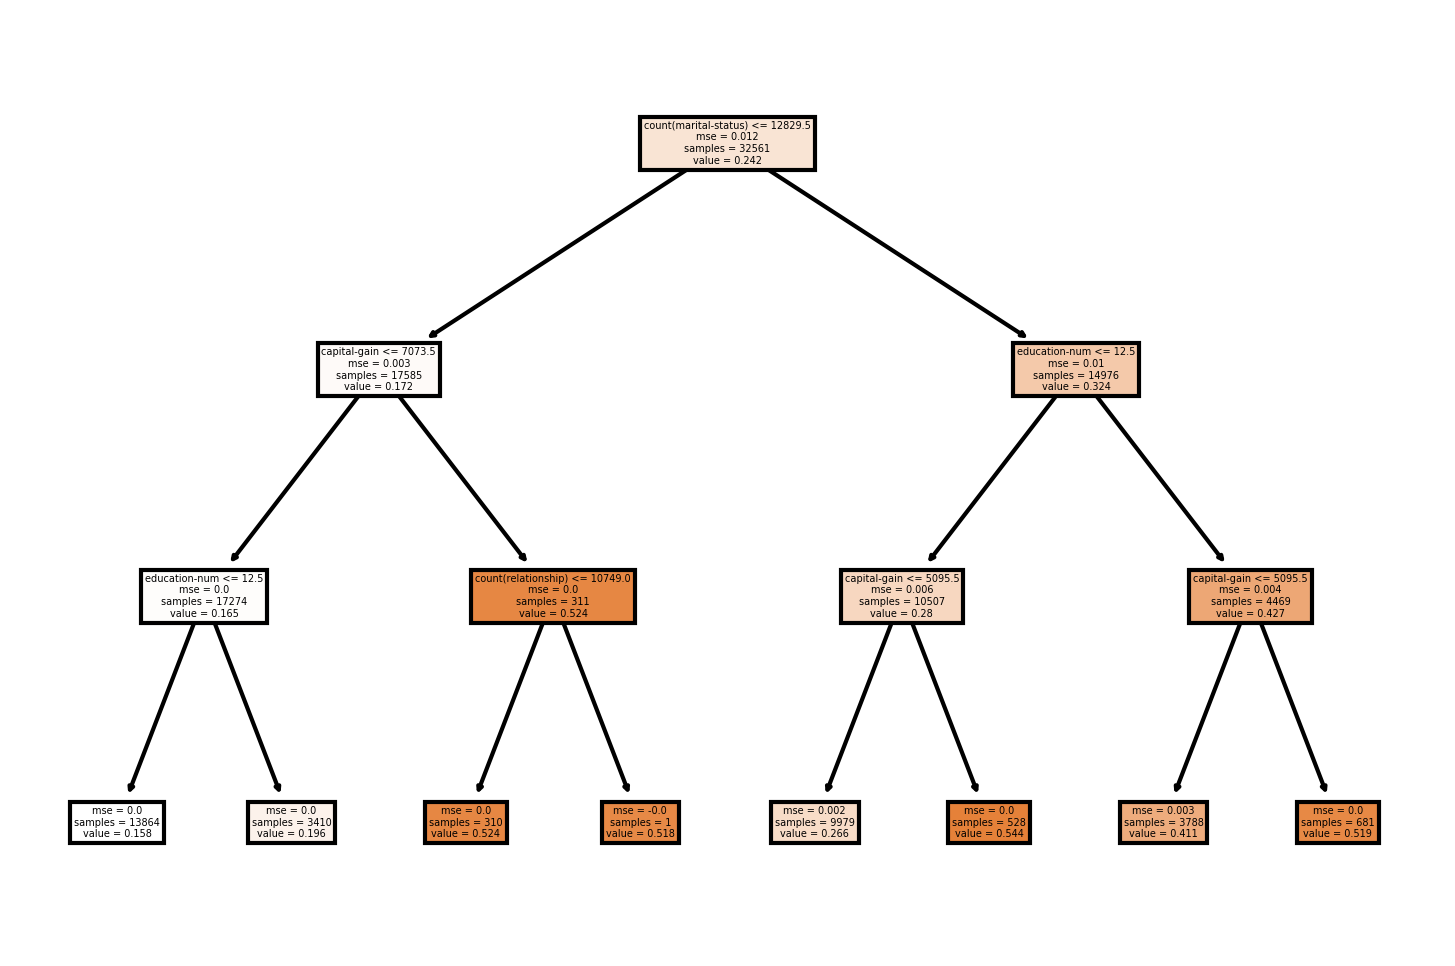

In [11]:
# plot the SurrogateTree
tree.plot_tree()